In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

from lamp import *
from lamp.models import *
from lamp.utils import *

## Linear Regression

In [2]:
a = round(rd.random() * 100, 2)
sigma = a / 2

xtrain = np.linspace(0, 2, 100).reshape(-1, 1)
ytrain = xtrain * a + np.random.uniform(-sigma, sigma, (100,1))

In [3]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain, nb_iter=1000, gradient_step=1e-5)

coef: 11.63
predicted: 11.44


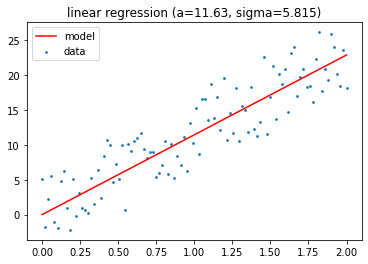

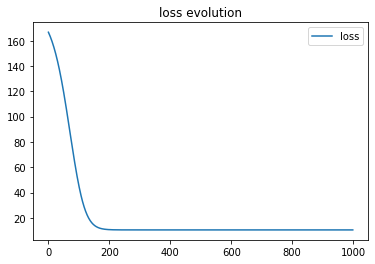

In [10]:
ahat = round(linreg.net._parameters[0][0], 2)
print(f"coef: {a}\npredicted: {ahat}")

plt.figure()
plt.title(f"linear regression (a={a}, sigma={sigma})")
plt.scatter(xtrain, ytrain, s=3, label="data")
plt.plot(xtrain, ahat * xtrain, color='red', label="model")
plt.legend()

plt.figure()
plt.title("loss evolution")
plt.plot(linreg.loss_list, label="loss")
plt.legend()

plt.show()

## Non-Linear

In [11]:
datax, datay = gen_arti(data_type=1)
datay = np.where(datay == -1, 0, 1)
print(f"batch : {datax.shape[0]}")

batch : 1000


score: 0.999


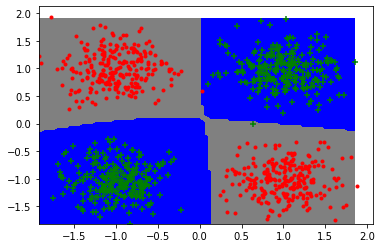

In [12]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden_size=20, nb_iter=1000, gradient_step=1e-3)
yhat = nonlin.predict(datax)
print(f"score: {nonlin.score(datax, datay)}")

plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.show()

score: 0.999


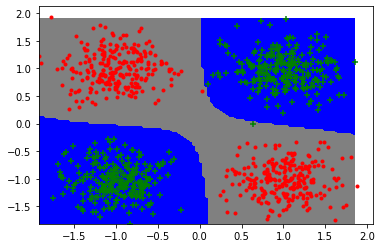

In [13]:
nonlin = NonLinear()
nonlin.fit(datax, datay, hidden_size=20, nb_iter=2000, gradient_step=1e-3, batch_size=100)
yhat = nonlin.predict(datax)
print(f"score: {nonlin.score(datax, datay)}")

plot_frontiere(datax, nonlin.predict, step=100)
plot_data(datax, datay.flatten())
plt.show()

## Multi class

In [2]:
def confusion_matrix(yhat, datay, n_classes=10):
    C = np.zeros((n_classes, n_classes))

    for i in range(yhat.size):
        C[yhat[i], datay[i]] += 1

    C /= C.sum(axis=1, keepdims=1)

    return C


In [3]:
classes = list(range(10))
trainx, trainy = get_usps(classes, *load_usps("../data/USPS_train.txt"))
testx, testy = get_usps(classes, *load_usps("../data/USPS_test.txt"))

onehot = np.zeros((trainy.size, 10))
onehot[np.arange(trainy.size), trainy] = 1

In [4]:
mc = MultiClass()
mc.fit(trainx, onehot, hidden=100, nb_iter=100, gradient_step=1e-2)

In [5]:
trainyhat = mc.predict(trainx)
trainscore = round(mc.score(trainx, trainy), 2)
cm1 = confusion_matrix(trainyhat, trainy)

testyhat = mc.predict(testx)
testscore = round(mc.score(testx, testy), 2)
cm2 = confusion_matrix(testyhat, testy)

cms = [cm1, cm2]
titles = [f"training score: {trainscore}", f"testing score: {testscore}"]

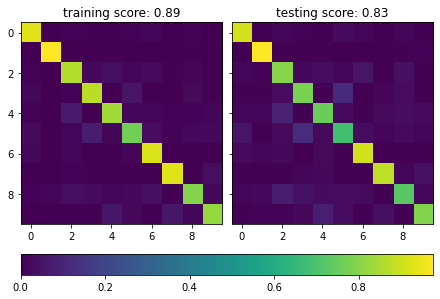

In [6]:
fig = plt.figure(constrained_layout=True)

axes = fig.subplots(nrows=1, ncols=2, sharey=True)
for ax, cm, title in zip(axes, cms, titles):
    im = ax.imshow(cm)
    ax.set_title(title)

fig.colorbar(im, ax=axes, location='bottom')
plt.show()


In [7]:
mc = MultiClass()
mc.fit(trainx, onehot, hidden=100, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

In [8]:
trainyhat = mc.predict(trainx)
trainscore = round(mc.score(trainx, trainy), 2)
cm1 = confusion_matrix(trainyhat, trainy)

testyhat = mc.predict(testx)
testscore = round(mc.score(testx, testy), 2)
cm2 = confusion_matrix(testyhat, testy)

cms = [cm1, cm2]
titles = [f"training score: {trainscore}", f"testing score: {testscore}"]

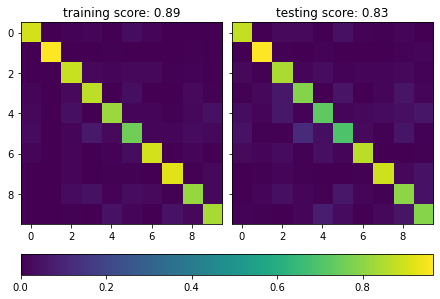

In [9]:
fig = plt.figure(constrained_layout=True)
axes = fig.subplots(nrows=1, ncols=2, sharey=True)
for ax, cm, title in zip(axes, cms, titles):
    im = ax.imshow(cm)
    ax.set_title(title)

fig.colorbar(im, ax=axes, location='bottom')
plt.show()


## Compression

In [41]:
def analyse_compression(model, datax, datay):
    decoded = model.predict(datax)

    # examples = np.random.choice(datax.shape[0], 10)

    examples = np.zeros(10, dtype=np.int64)
    for i in range(10):
        examples[i] = np.where(datay == i)[0][0]

    plt.figure(figsize=(12, 3))
    for i, x in enumerate(examples):
        plt.subplot(2,10,i+1)
        show_usps(datax[x])
        plt.subplot(2,10,i+11)
        show_usps(decoded[x])

    plt.show()

In [3]:
classes = list(range(10))
trainx, trainy = get_usps(classes, *load_usps("../data/USPS_train.txt"))
testx, testy = get_usps(classes, *load_usps("../data/USPS_test.txt"))

onehot = np.zeros((trainy.size, 10))
onehot[np.arange(trainy.size), trainy] = 1

In [43]:
ae = AutoEncoder()
ae.fit(trainx, onehot, hidden=100, nb_iter=1000, gradient_step=1e-4, batch_size=1000)

C:\Users\Jules Dubreuil\AppData\Local\Programs\Python\Python39\lib\site-packages\lamp-1.0-py3.9.egg\lamp\loss.py:43: RuntimeWarning: divide by zero encountered in log


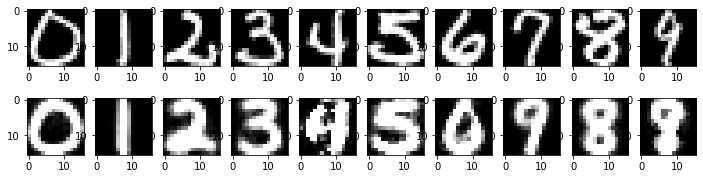

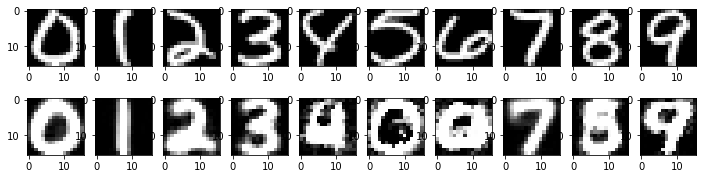

In [44]:
analyse_compression(ae, trainx, trainy)
analyse_compression(ae, testx, testy)

In [6]:
ae = AutoEncoder(loss=MSELoss())
ae.fit(trainx, onehot, hidden=100, nb_iter=100, gradient_step=1e-4, batch_size=1000)

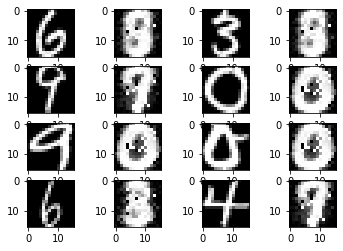

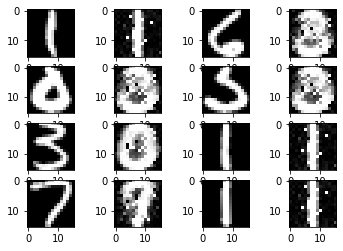

In [7]:
analyse_compression(ae, trainx)
analyse_compression(ae, testx)

In [8]:
ae = AutoEncoder(loss=SMCELoss())
ae.fit(trainx, onehot, hidden=100, nb_iter=100, gradient_step=1e-4, batch_size=1000)

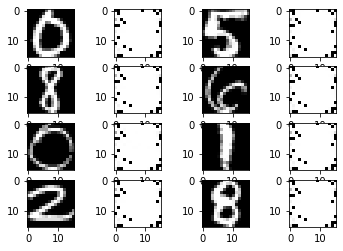

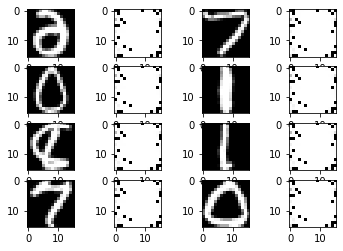

In [9]:
analyse_compression(ae, trainx)
analyse_compression(ae, testx)

In [140]:
decoded = ae.predict(trainx)

In [141]:
mc = MultiClass()
mc.fit(trainx, onehot, hidden=100, nb_iter=2000, gradient_step=1e-2, batch_size=1000)

print(f"init data score: {mc.score(mc.predict(trainx), trainy)}")
print(f"decoded data score: {mc.score(mc.predict(decoded), trainy)}")

AssertionError: 2 and 257 do not match

In [45]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [104]:
def tsne(datax, perplexities):
    tsnes = [
        TSNE(
            n_components=2,
            init="random",
            random_state=0,
            perplexity=perplexity,
            learning_rate="auto",
            n_iter=300,
        )
        for perplexity in perplexities
    ]
    return [tsne.fit_transform(datax) for tsne in tsnes]


def plot_tsne(embedded_datas, pred, perplexities):
    fig = plt.figure(figsize=(16, 4), constrained_layout=True)

    axes = fig.subplots(nrows=1, ncols=4, sharey=True)
    for i, ax in enumerate(axes):
        im = ax.scatter(embedded_datas[i][:, 0], embedded_datas[i][:, 1], c=pred)
        ax.set_title(f"Perplexity {perplexities[i]}")

    fig.colorbar(im, ax=axes, location="right")
    plt.show()


In [142]:
kmeans = KMeans(
    n_clusters=10,
    init="k-means++",
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=0,
)

In [144]:
init_pred = kmeans.fit_predict(trainx)
deco_pred = kmeans.fit_predict(decoded)

In [148]:
perplexities = [5, 30, 50, 86]
embedded_init = tsne(trainx, perplexities=perplexities)

In [149]:
embedded_deco = tsne(decoded, perplexities=perplexities)

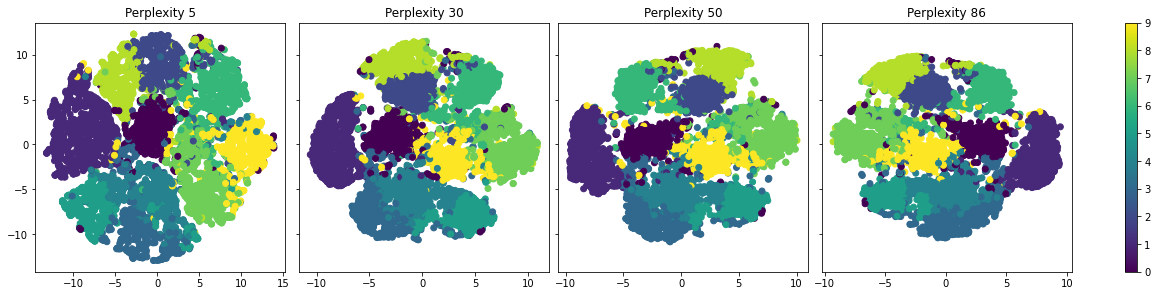

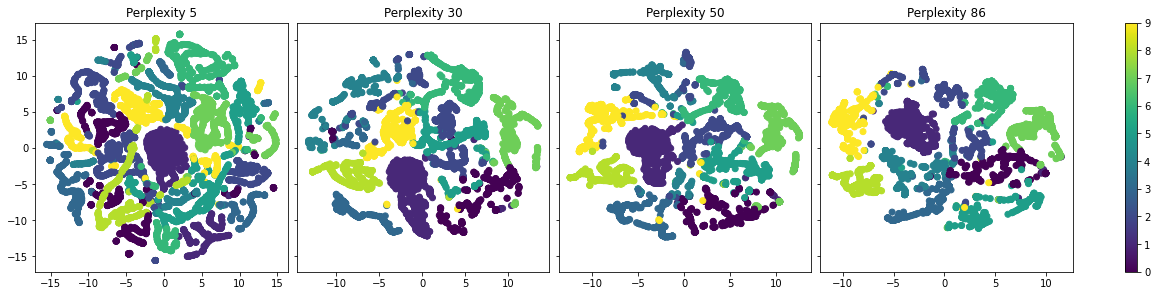

In [150]:
plot_tsne(embedded_init, init_pred, perplexities)
plot_tsne(embedded_deco, deco_pred, perplexities)